In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import re
from bs4 import BeautifulSoup

import nltk
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
symbols   = ['.', ',', '’','•','“','”','"', "''" ,'|',"'",'*','``','...', '**','$','%','&','#','-','--',"''",'""','?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"'s","'m","n't"]

stopwords.update(symbols)


def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
def getTag(ItemNo):     
    
    # Find Item location
    Item_TAG = soup.find_all('div', string=re.compile(r"^I[tT][eE][mM]."+str(ItemNo)+"[\W]"))
    if len(Item_TAG) == 0:
        Item_TAG = soup.find_all('p', string=re.compile(r"^I[tT][eE][mM]."+str(ItemNo)+"[\W]"))
        if len(Item_TAG) == 0:
            print('Get Error !')
            
    # Return the last found tag 
    return Item_TAG[-1]
    

In [2]:
Company = ['AAPL', 'GOOGL', 'HCA']
company = Company[1]

path    = './10-K Data/'+company
dic     = {}

for dirPath, dirNames, fileNames in os.walk(path):
    for f in fileNames:
        if bool(re.search(r"txt$",f)):
            year = re.findall(r"-\d\d-",f)[0]
            year = int('20'+ year[1]+year[2])-1
            dic[year] = os.path.join(dirPath, f)

In [3]:
year = 2018
file = codecs.open(dic[year], "r", "utf-8")
soup = BeautifulSoup(file.read(), "lxml")
print(dic[year])

./10-K Data/GOOGL\0001652044\10-k\0001652044-19-000004.txt


In [5]:
Data,Item1,Item5,Item7 = [],[],[],[]
lemmatizer = WordNetLemmatizer()
constraint = 3000
content = None

# Item 1           
for tag in getTag(1):
    i = 0
    for element in tag.next_elements:
        if element.name == 'div' and element.string != None and element.string != content:
            content = element.string
            Item1.append(content)
            Data.append([lemmatizer.lemmatize(word, pos="n")  for word in word_tokenize(content.lower()) if lemmatizer.lemmatize(word, pos="n") not in stopwords])
            i += 1 
        if bool(re.search(r"^I[tT][eE][mM].2[\W]", str(element.string))):
            print('Item 1 finished with',len(Item1))
            break
        if i > constraint:
            break    
            
# Item 5           
for tag in getTag(5):
    i = 0
    for element in tag.next_elements:
        if element.name == 'div' and element.string != None and element.string != content:
            content = element.string
            Item5.append(content)
            Data.append([lemmatizer.lemmatize(word, pos="n")  for word in word_tokenize(content.lower()) if lemmatizer.lemmatize(word, pos="n") not in stopwords])
            i += 1 
        if bool(re.search(r"^I[tT][eE][mM].6[\W]", str(element.string))):
            print('Item 5 finished with',len(Item5))
            break
        if i > constraint:
            break
            
# Item 7
for tag in getTag(7):
    i = 0
    for element in tag.next_elements:
        if element.name == 'div' and element.string != None and element.string != content:
            content = element.string
            Item7.append(content)
            Data.append([lemmatizer.lemmatize(word, pos="n")  for word in word_tokenize(content.lower()) if lemmatizer.lemmatize(word, pos="n") not in stopwords])
            i += 1 
        if bool(re.search(r"^I[tT][eE][mM].8[\W]", str(element.string))):
            print('Item 7 finished with',len(Item7))
            break
        if i > constraint:
            break

print('All Data with',len(Data))

Item 1 finished with 346
Item 5 finished with 69
Item 7 finished with 1406
All Data with 1821


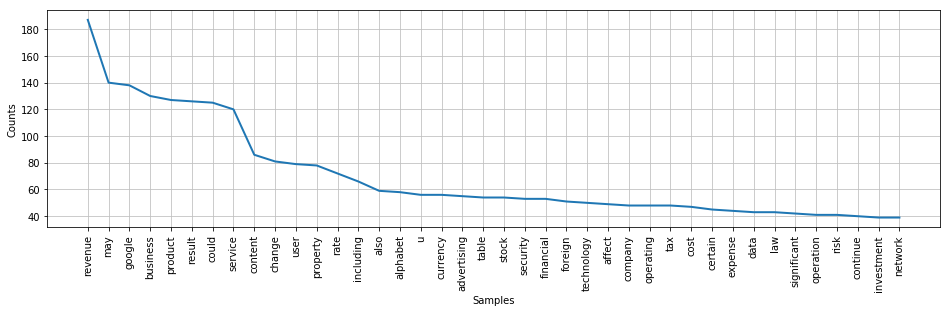

In [6]:
Data = sum(Data, [])
fdist_content = nltk.FreqDist(Data)
plt.figure(figsize=(16,4))
fdist_content.plot(40,cumulative=False)

In [7]:
df_content = pd.DataFrame.from_dict(fdist_content, orient='index')
df_content.columns = ['Counts']
df_content = df_content.sort_values(by=['Counts'], ascending=False)
df_content.to_csv(path+'/'+str(year)+'.csv')
df_content[:10]

,Counts
revenue,187
may,140
google,138
business,130
product,127
result,126
could,125
service,120
content,86
change,81
